<a href="https://colab.research.google.com/github/Amaljayaranga/DavisDataset/blob/master/Davis_new_25_4_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

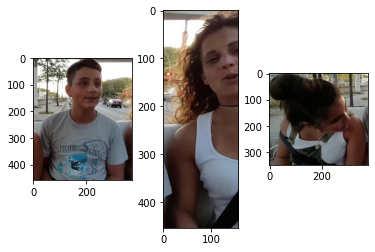

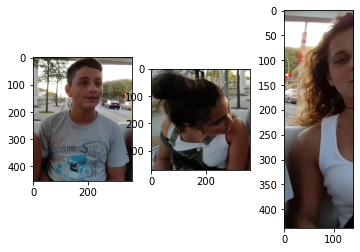

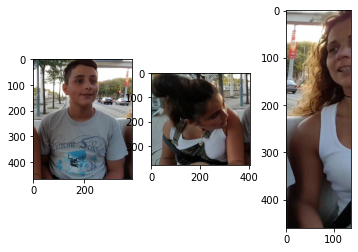

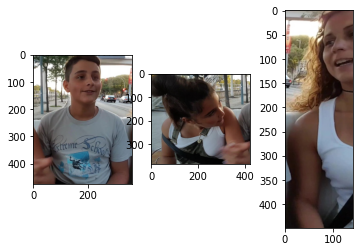

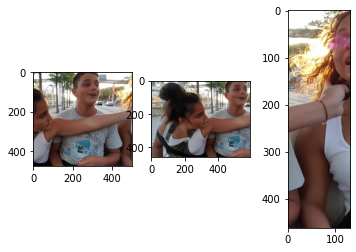

In [2]:
from torch.utils.data import Dataset
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2

class DavisDataset(Dataset):

    def __init__(self, memmap, json_data):

        ##cropping objects from memaps and add to idxes
        self.memmap = memmap
        self.json_data = json_data
        self.idxes = {}
        self.max_no_classes = 0

        imgs = self.json_data['imgs']
        for img_idx, img in enumerate(imgs):
            idx = int(img['index'])
            classes = img['objects']
            classes_ = []
            objects_ = []
            class_objects = []
            for class_idx, class_ in enumerate(classes):
                single_class = class_['class']
                if single_class in ['person']:
                 x = class_['x']
                 y = class_['y']
                 width = class_['width']
                 height = class_['height']

                 if class_idx > self.max_no_classes:
                    self.max_no_classes = class_idx

                 image = self.memmap[img_idx]
                 crop_img = image[y:y + height, x:x + width]
                 classes_.append(single_class)
                 objects_.append(crop_img)
            class_objects.append(classes_)
            class_objects.append(objects_)
            self.idxes[idx] = class_objects

    def __len__(self):
        return len(self.memmap)

    def __getitem__(self, index):
        classes, images = self.idxes.get(index)
        return classes, images


#loading memmap
folder_path  = './drive/My Drive/Thesis_2020/'
complete_shape=(43,480,854,3)
complete_memmap = folder_path+'all-people.mmap'
newfp = np.memmap(complete_memmap, dtype='uint8', mode='r', shape=complete_shape)


#loading json
complete_j = folder_path+'all-people-json.txt'
with open(complete_j) as json_file:
    data_json = json.load(json_file)


def show_objects(images):
  img_np_0 = np.asarray(images[0])
  img_np_1 = np.asarray(images[1])
  img_np_2 = np.asarray(images[2])

  f, axarr = plt.subplots(1, 3)
  axarr[0].imshow(cv2.cvtColor(img_np_0, cv2.COLOR_BGR2RGB))
  axarr[1].imshow(cv2.cvtColor(img_np_1, cv2.COLOR_BGR2RGB))
  axarr[2].imshow(cv2.cvtColor(img_np_2, cv2.COLOR_BGR2RGB))
  plt.show()


siamese = DavisDataset(newfp, data_json)
for i in range(5):
  classes, images  = siamese.__getitem__(i)
  show_objects(images)




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
